In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [6]:
gamma = 0.6
rewardSize = -1
gridSize = 4
terminationStates = [[0,0],[gridSize-1,gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]] # up down left right
numIterations = 10000

In [7]:
terminationStates

[[0, 0], [3, 3]]

In [9]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)} #dictionary with keys and values 

In [10]:
returns

{(0, 0): [],
 (0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (1, 0): [],
 (1, 1): [],
 (1, 2): [],
 (1, 3): [],
 (2, 0): [],
 (2, 1): [],
 (2, 2): [],
 (2, 3): [],
 (3, 0): [],
 (3, 1): [],
 (3, 2): [],
 (3, 3): []}

In [11]:
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}  #dictionary with keys and values 

In [12]:
deltas

{(0, 0): [],
 (0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (1, 0): [],
 (1, 1): [],
 (1, 2): [],
 (1, 3): [],
 (2, 0): [],
 (2, 1): [],
 (2, 2): [],
 (2, 3): [],
 (3, 0): [],
 (3, 1): [],
 (3, 2): [],
 (3, 3): []}

In [13]:
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [14]:
states

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

In [ ]:
def generateEpisode(): # episode 실행. state reward action 반영
    initState = random.choice(states[1:-1]) # state위치 랜덤으로 선택
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState) + np.array(action)
        
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    for i, step in enumerate(episode[::-1]): # episode[::-1] : 뒤집어서 열로 펴준다. 내림차순 정렬.
        G = gamma * G + step[2] 
        # step[2] 는 reward , 지금의 state에서 부터 먼 녀석의 r의 제곱이 많이 되어 있어야 한다.
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0],step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1337.30it/s]


Value Table
 [[ 0.         -1.63667301 -2.22229616 -2.38034695]
 [-1.63461608 -2.1034742  -2.28288406 -2.22246959]
 [-2.21716782 -2.2804307  -2.09943794 -1.63817291]
 [-2.38496933 -2.22966502 -1.64238679  0.        ]]


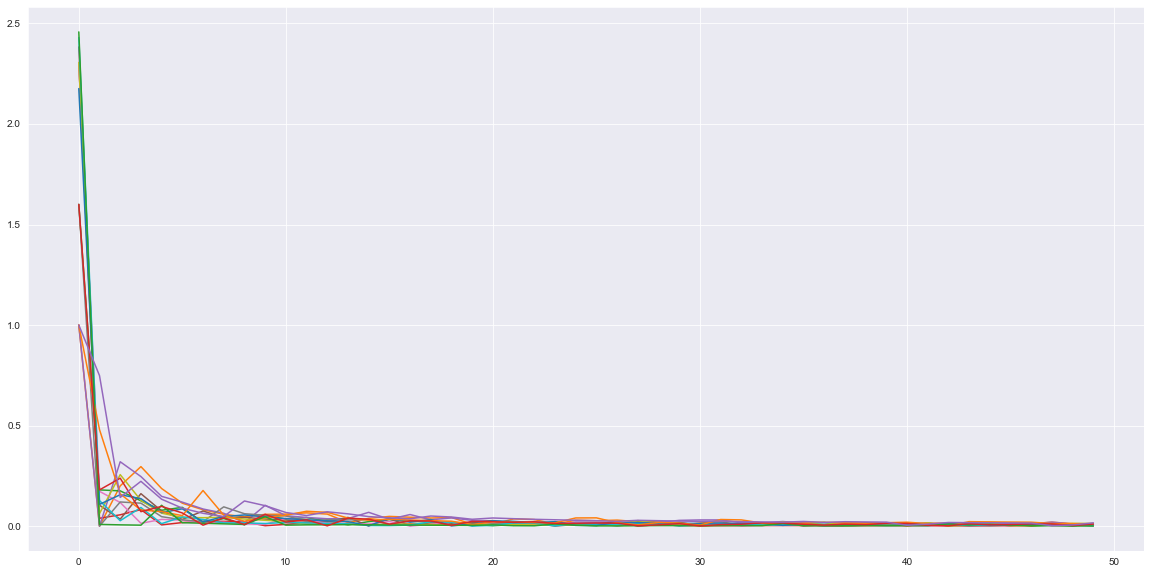

In [5]:
            
print("Value Table\n", V) # 어느 자리에 있던지 작아지는 값쪽으로 가면 된다.

# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)